In [1]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.append('/envs')
sys.path.append('/models')
import envs.viper as vpr
import models.models as models
import models.dqn as dqn

In [3]:
import importlib
importlib.reload(vpr); importlib.reload(models); importlib.reload(dqn)

<module 'models.dqn' from 'h:\\Coding Projects\\Python Projects\\Deep-XIV-Rotation\\models\\dqn.py'>

In [4]:
viper_env = vpr.Viper(_sks = 798)

b123


In [5]:
torch.cuda.empty_cache()

In [6]:
#state = viper_env.state()
#state[None, :]

In [7]:
#state.unsqueeze(0)

In [8]:
agent = dqn.DQN(viper_env, _max_history=2048)

Created model dense_v1 with 15 features and 10 actions.
Model loaded onto cuda:0.
Layer (type:depth-idx)                   Output Shape              Param #
DenseNetV1                               [196, 10]                 --
├─Sequential: 1-1                        [196, 10]                 --
│    └─Linear: 2-1                       [196, 4096]               65,536
│    └─ReLU: 2-2                         [196, 4096]               --
│    └─Linear: 2-3                       [196, 4096]               16,781,312
│    └─ReLU: 2-4                         [196, 4096]               --
│    └─Linear: 2-5                       [196, 2048]               8,390,656
│    └─BatchNorm1d: 2-6                  [196, 2048]               4,096
│    └─ReLU: 2-7                         [196, 2048]               --
│    └─Dropout: 2-8                      [196, 2048]               --
│    └─Linear: 2-9                       [196, 2048]               4,196,352
│    └─ReLU: 2-10                        [19

In [9]:
viper_env.compute_gcd(2.5, 798, 15)

2.08

In [10]:
action_sequence=[1, 3, 6, 9, 0, 2, 5, 0, 0]

In [11]:
agent.env.reset_env()
print(agent.env.state())
print(agent.env.valid_actions())
print([np.random.choice(agent.env.valid_actions()[1])])
print(agent.env.gcd)

tensor([ 2.4500, 10.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000])
([True, True, False, False, False, False, False, False, False, False], [0, 1])
[1]
2.45


In [12]:
agent.get_action(agent.env.state(), e=1)[0]

tensor(1, dtype=torch.int32)

In [13]:
agent.train(gamma=0.80, num_epochs=2000, session_limit=100)

Epoch 0 Loss: 0.004 E_0: 0.40 E_1: 0.000 G: 0.80 Rewards: -159.5 Eval Rewards: -124.80
Epoch 1 Loss: 0.005 E_0: 0.40 E_1: 0.000 G: 0.80 Rewards: -71.6 Eval Rewards: -124.80
Epoch 2 Loss: 0.005 E_0: 0.40 E_1: 0.000 G: 0.80 Rewards: -77.0 Eval Rewards: -124.80
Epoch 3 Loss: 0.005 E_0: 0.39 E_1: 0.000 G: 0.80 Rewards: -133.5 Eval Rewards: -117.60
Epoch 4 Loss: 0.005 E_0: 0.39 E_1: 0.000 G: 0.80 Rewards: -157.6 Eval Rewards: -117.60
Epoch 5 Loss: 0.005 E_0: 0.39 E_1: 0.000 G: 0.80 Rewards: -140.4 Eval Rewards: -117.60
Epoch 6 Loss: 0.005 E_0: 0.38 E_1: 0.000 G: 0.80 Rewards: -117.3 Eval Rewards: -117.60
Epoch 7 Loss: 0.005 E_0: 0.37 E_1: 0.000 G: 0.80 Rewards: -83.8 Eval Rewards: -117.60
Epoch 8 Loss: 0.005 E_0: 0.36 E_1: 0.000 G: 0.80 Rewards: -115.8 Eval Rewards: -117.60
Epoch 9 Loss: 0.005 E_0: 0.35 E_1: 0.000 G: 0.80 Rewards: -99.1 Eval Rewards: -117.60
Epoch 10 Loss: 0.005 E_0: 0.34 E_1: 0.000 G: 0.80 Rewards: -158.1 Eval Rewards: -102.30
Epoch 11 Loss: 0.005 E_0: 0.33 E_1: 0.000 G: 0

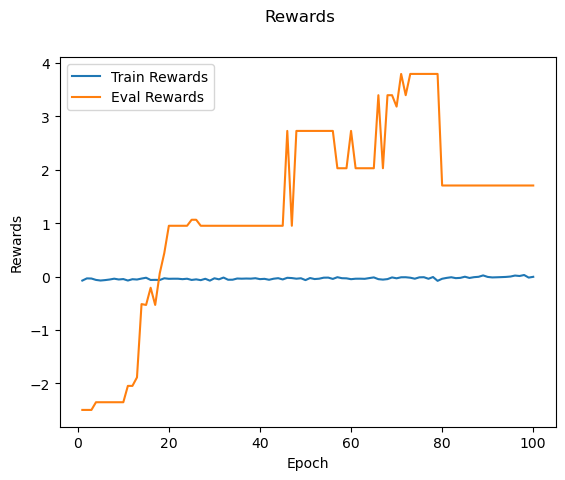

In [14]:
history_x = agent.training_history_x
history_y = agent.training_history_y
fig, ax = plt.subplots()
fig.suptitle('Rewards')
ax.plot(history_x, history_y)
ax.legend(['Train Rewards', 'Eval Rewards'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Rewards')
plt.savefig('rewards_graph.png', bbox_inches='tight')
plt.show()

In [13]:
agent.load_checkpoint(f'./checkpoints/_{agent.model_name}_last.pth')

h:\Coding Projects\Python Projects\Deep-XIV-Rotation\models\dqn.py:268: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


RuntimeError: Error(s) in loading state_dict for DenseNetV1:
	Missing key(s) in state_dict: "sequence.8.weight", "sequence.8.bias", "sequence.11.weight", "sequence.11.bias", "sequence.14.weight", "sequence.14.bias", "sequence.14.running_mean", "sequence.14.running_var", "sequence.16.weight", "sequence.16.bias", "sequence.18.weight", "sequence.18.bias". 
	Unexpected key(s) in state_dict: "sequence.7.weight", "sequence.7.bias", "sequence.10.weight", "sequence.10.bias", "sequence.12.weight", "sequence.12.bias", "sequence.13.running_mean", "sequence.13.running_var", "sequence.13.num_batches_tracked", "sequence.15.weight", "sequence.15.bias", "sequence.17.weight", "sequence.17.bias". 
	size mismatch for sequence.13.weight: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([2048, 2048]).

In [16]:
agent.test(num_steps=50)

tensor([ 2.4500, 10.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000])
Took action: 1-reaving_fangs @ 0.000
(2.6, 200, 200.82)
Took action: 3-swiftskins_sting @ 2.450
(1.1, 300, 313.14)
Took action: 6-hindsting_strike @ 4.900
(3.1, 400, 401.24)
Took action: 9-death_rattle @ 5.600
(4.2, 280, 286.44)
Took action: 0-steel_fangs @ 6.980
(3.2399999999999998, 300, 309.35)
Took action: 2-hunters_sting @ 9.060
(1.8399999999999999, 300, 294.75)
Took action: 5-flanksbane_fang @ 11.140
(6.840000000000001, 550.0, 554.46)
Took action: 1-reaving_fangs @ 13.220
(2.44, 330.0, 346.4)
Took action: 3-swiftskins_sting @ 15.300
(2.44, 330.0, 327.05)
Took action: 6-hindsting_strike @ 17.380
(4.6400000000000015, 440.00000000000006, 430.43)
Took action: 9-death_rattle @ 18.080
(4.76, 308.0, 305.89)
Took action: 0-steel_fangs @ 19.460
(3.84, 330.0, 341.63)
Took action: 2-hunters_sting @ 21.540
(2.44, 330.0, 343.21)
Took action: 5-

189.76000000000002

In [17]:
pred = agent.predict(agent.env.state())
pred

tensor([[-0.2471, -0.1529,  0.2862,  0.3165, -0.3397, -0.3899, -0.2908, -0.3743,
         -0.4397, -0.4315]], device='cuda:0')

In [18]:
soft = torch.nn.Softmax(dim=1)
soft(pred)

tensor([[0.0923, 0.1014, 0.1574, 0.1622, 0.0841, 0.0800, 0.0884, 0.0813, 0.0761,
         0.0768]], device='cuda:0')

In [19]:
torch.multinomial(soft(pred), 2, replacement=True)[0][0]

tensor(4, device='cuda:0')

In [20]:
agent.env.state()

tensor([2.0800, 0.7000, 0.0000, 0.9883, 0.8785, 0.7225, 0.0000, 0.0000, 0.9537,
        0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000])

In [21]:
torch.from_numpy(np.random.randint(agent.actions, size = 1))[0]

tensor(6, dtype=torch.int32)